- instuctions

A large group of Sea Turtles is visiting our island, trying to sell their Flippers. For a reasonable price of course.

You only have two chances to offer a good price. Each one of the Sea Turtles will accept the lowest bid that is over their reserve price. For your second bid only, the Sea Turtles also take into account the average of all second bids from traders across the archipelago. They’ll trade with you when your offer is above the average of all second bids.

There’s a constant desire for Flippers on the archipelago. So, at the end of the round, you’ll be able to sell them for 320 SeaShells a piece. Your goal is to set prices that ensure a profitable trade with as many Sea Turtles as possible.

Once you are satisfied with your strategy and input, use the ‘Submit manual trade’ button to lock it in. Note that you can (re)submit new strategies as long as the round is still in progress. As soon as the round ends, the trading strategy that was submitted last will be processed.

- video

selling flippers because they dont want to carry then on the journey a nymore
2 chances to offer a "good" price

will accpet lowest bid above reserve price

easily sell for 320 shells at the end of the round

second bid: average of all second bids, they will give if our bid is above the average

if below they might still trade but there is a lower probability (2nd round only)

- wiki

A big group of Sea Turtles is visiting our shores, bringing with them an opportunity to acquire some top grade `FLIPPERS`. You only have two chances to offer a good price. Each one of the Sea Turtles will accept the lowest bid that is over their reserve price. 

The distribution of reserve prices is uniform between 160–200 and 250–320, but none of the Sea Turtles will trade between 200 and 250 due to some ancient superstition.

For your second bid, they also take into account the average of the second bids by other traders in the archipelago. They’ll trade with you when your offer is above the average of all second bids. But if you end up under the average, the probability of a deal decreases rapidly. 

To simulate this probability, the PNL obtained from trading with a fish for which your second bid is under the average of all second bids will be scaled by a factor *p*:

$$
p = (\frac{320 – \text{average bid}}{320 – \text{your bid}})^3
$$

You know there’s a constant desire for Flippers on the archipelago. So, at the end of the round, you’ll be able to sell them for 320 SeaShells ****a piece.

Think hard about how you want to set your two bids, place your feet firmly in the sand and brace yourself, because this could get messy.


mod:

yes,even if your first bid is 220 for example, all the turtles in the first leg (160-200) will trade with you. The 200 - 250 gap is just for their reserve prices 


- ....

notes
- can sell for 320 at end of round
- second round is based off average of all bids; guaranteed if we offer above average, low and quickly decreasing probability if we offer below
- unfirom distribution of reserve prices between 160-200 and 250-320
- none will trade between 200 and 250
- kevin recommends 200 and 285
- second bid profti(if less than average) = ((320-avg) / (320 - bid) )^ 3

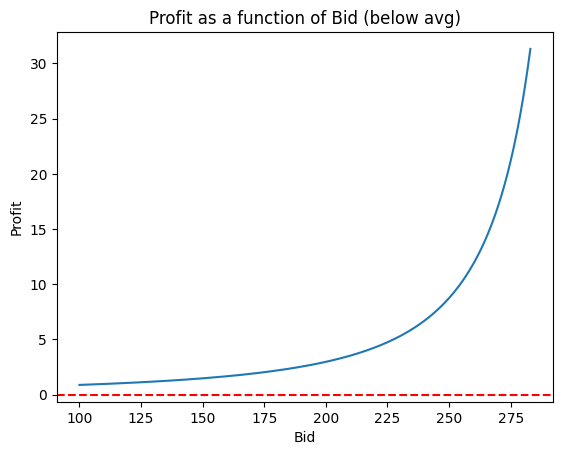

In [33]:
import matplotlib.pyplot as plt

avg = 285 # change for different predictions
avg = min(avg, 319)  # Ensure avg is not greater than 320 - that would make no sense burh

bids_below_avg = range(100, avg)  # range of bid values

scale_factors = [((320-avg) / (320 - b))**3 for b in bids]  # calculate profit for each bid
profit_below_avg = [scale * (320 - bid) for scale, bid in zip(scale_factors, bids)]  # calculate profit

bids_above_avg = range(avg, 319)

profit_above_avg = [320 - bid for bid in bids_above_avg]  # calculate profit for each bid

plt.plot(bids_below_avg, profit_below_avg)

plt.plot(bids_above_avg, profit_above_avg, label='Profit above avg')


plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Bid')
plt.ylabel('Profit')
plt.title('Profit as a function of Bid (below avg)')
plt.show()

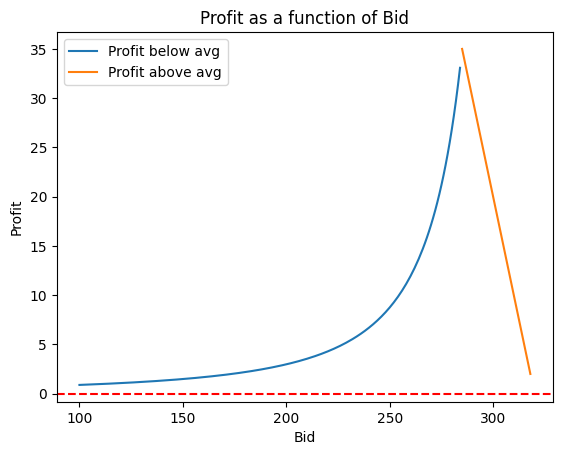

In [36]:
import matplotlib.pyplot as plt

avg = 285  # change for different predictions
avg = min(avg, 319)  # Ensure avg is not greater than 319 - that would make no sense

# Define the bid ranges for below and above avg
bids_below_avg = range(100, avg)  # range of bid values below avg
bids_above_avg = range(avg, 319)  # range of bid values above avg

# Calculate scale factors and profit for bids below avg
scale_factors = [((320 - avg) / (320 - b))**3 for b in bids_below_avg]
profit_below_avg = [scale * (320 - bid) for scale, bid in zip(scale_factors, bids_below_avg)]

# Calculate profit for bids above avg
profit_above_avg = [320 - bid for bid in bids_above_avg]

# Plot both profit curves on the same figure
plt.plot(bids_below_avg, profit_below_avg, label='Profit below avg')
plt.plot(bids_above_avg, profit_above_avg, label='Profit above avg')

plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Bid')
plt.ylabel('Profit')
plt.title('Profit as a function of Bid')
plt.legend()
plt.show()

 %% [markdown]
 # Sea Turtle Trading Game Simulation
 
 In this simulation we assume:
 
 - **Turtle reservation prices:** Two disjoint groups:
   - Group 1: r uniformly distributed on [160, 200]
   - Group 2: r uniformly distributed on [250, 320]
 - **Competitor first bids:** For a turtle with reservation price r, assume that each of the ~10,000 competitors bids `r + m`, where m is drawn uniformly from 1 to 10.
 - **Your bids:** A fixed pair:
     - First bid: `F`
     - Second bid: `S`
 - **Trading rules:**
   - A turtle will trade on the **first bid** if:
     - Your bid F exceeds its reservation price _and_
     - Your bid F is lower than all competitor first bids.
   - If you do not get the trade in round one, the turtle evaluates the **second bid**:
     - First, your second bid S must exceed the turtle's reservation price.
     - Then, if **S ≥ avg_second_competitor**, you get full profit: (320 - S).
     - Otherwise, your profit is scaled by  
 
       \[
       p = \left(\frac{320 - \text{avg\_second\_competitor}}{320 - S}\right)^3.
       \]
 
 - **Profit per trade:** In either round, if you win, your profit is the (scaled) margin = 320 minus the bid used.
 


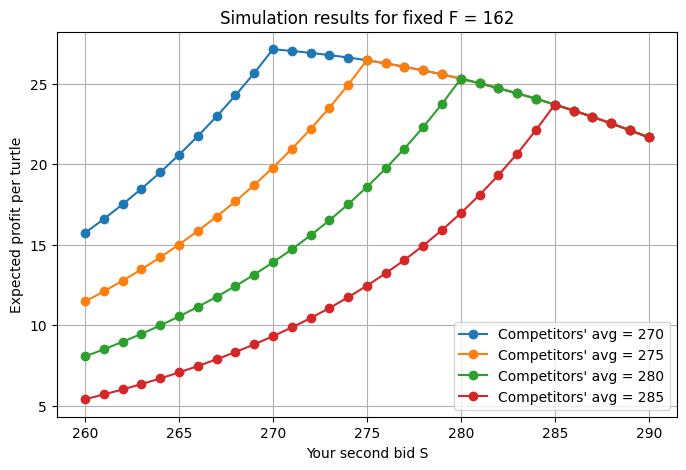

In [34]:
import numpy as np

# Set simulation parameters
n_turtles = 1000000  # large sample to approximate continuity

# Reservation price groups
# We'll treat them as continuous integers for simulation.
# (Note: In a real game, these are integers. Adjust if needed.)
n_group1 = int(n_turtles * (40 / (40 + 70)))  # Group1: range 160-200 (length 40)
n_group2 = n_turtles - n_group1             # Group2: range 250-320 (length 70)

# Generate reservation prices (as integers)
# For Group 1, uniformly from 160 to 200 (we assume inclusive lower, exclusive upper for simplicity)
r_group1 = np.random.randint(160, 201, size=n_group1)
# For Group 2, uniformly from 250 to 320
r_group2 = np.random.randint(250, 321, size=n_group2)

# Combine into one array of reservation prices
reservations = np.concatenate([r_group1, r_group2])
n_total = len(reservations)

# %%
# Define function to simulate one round given fixed bids F and S.
# avg_second_competitor is the assumed average second bid from competitors.
def simulate_game(F, S, avg_second_competitor, n_competitors=10000):
    """
    Simulate trades for a given pair of bids (F, S).
    
    Parameters:
        F: your first bid (integer)
        S: your second bid (integer)
        avg_second_competitor: assumed competitor average for second bid
        n_competitors: number of competing teams (used for first bid simulation)
        
    Returns:
        expected profit per turtle (average over simulated turtles)
    """
    
    # For each turtle, simulate competitor first bids:
    # We assume each competitor bids = reservation price + m, with m uniformly in [1, 10]
    # We simulate the minimum competitor bid for each turtle.
    # For simplicity, we simulate n_competitors draws for each turtle and take the minimum.
    # However, since n_competitors is large, note that the minimum is likely to be very close to r+1.
    # We can approximate the minimum: if m ~ Uniform(1, 10), then the minimum of N draws is:
    #   r + 1 with high probability. 
    # Here, we simulate explicitly for a subset of turtles to keep computation fast.
    
    # For our simulation, approximate min competitor bid as:
    #   min_bid = r + min(m_1, m_2, ..., m_n_competitors)
    # The minimum of Uniform(1,10) over many draws is almost always 1.
    # We add a tiny noise to reflect the rare occasion of a slightly higher minimum.
    noise = np.random.rand(n_total) * 0.1  # very small noise
    min_competitor_bid = reservations + 1 + noise  # nearly always r+1
    
    profit = np.zeros(n_total)
    
    # Outcome if trade occurs in first round:
    # Condition: F > reservation and F <= min_competitor_bid.
    # (That is, your bid exceeds the turtle's r and is lower than the competitor minimum.)
    win_first = (F > reservations) & (F <= min_competitor_bid)
    # For trades won in round one, profit is (320 - F)
    profit[win_first] = 320 - F
    
    # For turtles not won in round one, try round two.
    # Condition: S > reservation (bid must exceed r)
    eligible_second = (S > reservations)
    # Now, if your second bid S is at least the average competitor second bid,
    # you get full margin. Otherwise, your effective profit is scaled.
    # (We assume that if S equals avg, you win full trade.)
    
    win_second_full = eligible_second & (S >= avg_second_competitor)
    profit[win_second_full] = 320 - S  # full profit
    
    # For those eligible for second bid but S < avg competitor second bid,
    # scale profit by factor p.
    win_second_scaled = eligible_second & (S < avg_second_competitor)
    if S < 320:
        p = ((320 - avg_second_competitor) / (320 - S)) ** 3
    else:
        p = 0  # if S == 320, no margin remains
    profit[win_second_scaled] = p * (320 - S)
    
    # Return average profit per turtle (in SeaShells)
    return np.mean(profit)

# %%
# Now, let us test the simulation for a range of bid pairs.
# For example, suppose we try:
# - First bid: F = 162 (this is low so that for Group1, if r==160 you win)
# - Second bid: We'll experiment with several values around the expected competitor average.
F_candidate = 162

S_values = range(260, 291)  # try second bids from 260 to 290
# Let’s assume a competitor average for second bids.
# For the simulation, we can try several assumptions.
avg_second_candidates = [270, 275, 280, 285]

results = {}
for avg_second in avg_second_candidates:
    sim_profits = []
    for S_candidate in S_values:
        avg_profit = simulate_game(F_candidate, S_candidate, avg_second_competitor=avg_second)
        sim_profits.append(avg_profit)
    results[avg_second] = sim_profits

# %%
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
for avg_second, profits in results.items():
    plt.plot(list(S_values), profits, marker="o", label=f"Competitors' avg = {avg_second}")
plt.xlabel("Your second bid S")
plt.ylabel("Expected profit per turtle")
plt.title(f"Simulation results for fixed F = {F_candidate}")
plt.legend()
plt.grid(True)
plt.show()

 %%
 You can now inspect the printed/plot results to look for a peak in profit.
 In many cases, the simulation suggests that the best S is very close to the assumed competitor average.
 For example, if competitors' average is around 280, you might find S = 280 or 281 maximizes profit.

 ## Discussion:

 - **First bid (F):** Because of the very large number of teams and the assumption that competitors bid nearly at r+1,
   your chance to secure a trade in round one is only nonzero for the very lowest reservations (e.g. when r = 160 for F=162).  

 - **Second bid (S):** 
   Choosing S slightly below the competitor average leads to a penalty. In contrast, choosing S equal to or above the expected competitor average means you get the full margin (320 - S). However, bidding too high will lower your margin.

 ### Suggested Strategy:
 - **First Bid:** A very low bid such as F ≈ 161–162 maximizes profit on the rare wins in Group 1.
 - **Second Bid:** Estimate the competitors' average second bid (e.g., via historical data or further simulation) and set S equal to that value.

 In our simulation example, if historical estimates suggest that competitors are bidding around 280 for round two, then the robust choice is to set S ≈ 280.

 In a live game you might experiment with slight deviations (e.g., 279 or 281) and run a simulation (or use previous rounds’ data) to refine the estimate.

 This simulation code is highly stylized (and hinges on the assumption for competitor behavior) but provides a framework to test and optimize your two bids. You can adjust the assumptions (e.g. the distribution of competitor markups) or even run an iterative simulation where you “learn” the competitor average from past rounds.

 **Conclusion:**  
 The near‐optimal approach under these assumptions is:

 - **For Group 1:** Set F very low (such as F = 162), capturing a small subset of very low-reserve turtles with high profit margins.
 - **For Group 2:** Set S approximately equal to the expected competitor average (for instance, S = 280 if competitor second bids average around 280), which secures full profit (320 - 280 = 40) on those trades.

 This strategy leverages the fact that while you cannot tailor bids per turtle, a two‐bid system lets you “specialize” — bidding extremely low on first pass for a slim but profitable opportunity in Group 1 and bidding in a conservative equilibrium fashion for Group 2 through your second bid.

 You can now run and modify the code to test other pairs (F, S) and assumptions to further refine your strategy.


## chris tips
- p ditribution of what you ezpect others to guess
rather guess above than below


In [35]:
# %% [code]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set simulation parameters
np.random.seed(42)
n_turtles = 100000  # simulate many turtles
n_competitors = 10000  # number of competing teams

# Allowed bidding intervals based on the superstition:
# Low group: bids in 161 to 200
# High group: bids in 250 to 320

# Reserve price distributions:
# Assume half of the turtles have reserves uniformly in [160,200]
# and half have reserves uniformly in [250,320].
def sample_reserve_prices(n):
    # 50% chance for each group
    groups = np.random.choice(['low', 'high'], size=n)
    reserves = np.zeros(n)
    # low group: uniform [160,200]
    low_idx = (groups == 'low')
    reserves[low_idx] = np.random.uniform(160, 200, size=low_idx.sum())
    # high group: uniform [250,320]
    high_idx = (groups == 'high')
    reserves[high_idx] = np.random.uniform(250, 320, size=high_idx.sum())
    return reserves, groups

# We set up competitor bids as a simplifying assumption:
# For the first bid, assume every competitor bids 161 if the low group is the target,
# and 251 if targeting the high group.
# For the second bid, assume competitors bid 161 (low group) or 251 (high group).
# For our simulation here, we assume everyone targets the low group.
comp_first_bid = 161  
comp_second_bid = 161

# Define the trade outcome for a given turtle.
def simulate_trade(first_bid, second_bid, reserve, competitor_first, competitor_second):
    """
    Simulates the outcome for one turtle given our bids.
    - If our bid is not higher than the reserve, no trade.
    - For the first auction: The winning bid is the minimum among all bids above the reserve.
      (If our bid ties for the lowest, we assume a tie-breaker with probability 1/(#teams tied)).
    - If we do not win the first bid, then in the second round:
        * Trade will happen if our second bid exceeds reserve.
        * But if our second bid < competitor second bid (which we assume is the average for our simulation),
          then our profit is scaled by p.
    Returns profit made on the flipper or 0 if no trade.
    """
    # First, check first bid validity: bid must exceed reserve and be in an allowed region.
    # (For our simulation, we assume allowed if bid <= 200 for low group.)
    profit = 0
    if (first_bid > reserve) and (first_bid <= 200):
        # In a real auction, many teams will bid the same low amount.
        # Assume competitor teams all bid competitor_first (161 if low group).
        # If our bid is lower than competitor bid, we win outright.
        if first_bid < competitor_first:
            profit = 320 - first_bid
            return profit
        elif first_bid == competitor_first:
            # Tie-break: chance of winning is 1/(n_competitors+1)
            if np.random.rand() < 1/(n_competitors + 1):
                profit = 320 - first_bid
                return profit
            # Else, we lose this round.
    
    # If we lose the first round, try the second bid.
    # It must exceed the reserve and be in an allowed interval.
    if (second_bid > reserve) and (second_bid <= 200):
        base_profit = 320 - second_bid
        avg_bid = competitor_second  # assume fixed average competitor second bid
        if second_bid > avg_bid:
            profit = base_profit
        else:
            # scaling factor p
            p = ((320 - avg_bid) / (320 - second_bid)) ** 3
            profit = base_profit * p
    return profit

# Run a simulation for a given pair of (first_bid, second_bid)
def simulate_strategy(first_bid, second_bid, n_turtles=n_turtles):
    reserves, groups = sample_reserve_prices(n_turtles)
    profits = np.zeros(n_turtles)
    for i in range(n_turtles):
        profits[i] = simulate_trade(first_bid, second_bid, reserves[i],
                                    comp_first_bid, comp_second_bid)
    return np.mean(profits), np.sum(profits)

# Try out the proposed strategy: first_bid = 161, second_bid = 162
mean_profit, total_profit = simulate_strategy(161, 162)
print("Strategy: first_bid=161, second_bid=162")
print("Average profit per turtle: {:.2f}".format(mean_profit))
print("Total profit (over {} turtles): {:.2f}".format(n_turtles, total_profit))

# %% [code]
# A simple grid search over allowed bids in the low group to see how average profit varies.
first_bid_range = np.arange(161, 201)  # 161 to 200 for first bid
second_bid_range = np.arange(161, 201)  # same for second bid

results = []
for fb in first_bid_range:
    for sb in second_bid_range:
        mean_pf, _ = simulate_strategy(fb, sb, n_turtles=50000)  # use fewer turtles for speed
        results.append((fb, sb, mean_pf))
        
results_df = pd.DataFrame(results, columns=["First Bid", "Second Bid", "Mean Profit"])
results_df.sort_values("Mean Profit", ascending=False, inplace=True)
print("\nTop 10 strategies by average profit per turtle:")
print(results_df.head(10))

# %% [code]
# A heatmap (using matplotlib) for visual representation:
pivot_table = results_df.pivot(index="First Bid", columns="Second Bid", values="Mean Profit")
plt.figure(figsize=(10, 8))
plt.imshow(pivot_table, origin='lower', aspect='auto', 
           extent=[pivot_table.columns.min(), pivot_table.columns.max(),
                   pivot_table.index.min(), pivot_table.index.max()])
plt.colorbar(label="Average Profit per Turtle")
plt.xlabel("Second Bid")
plt.ylabel("First Bid")
plt.title("Heatmap of Average Profit per Turtle")
plt.show()

Strategy: first_bid=161, second_bid=162
Average profit per turtle: 3.92
Total profit (over 100000 turtles): 391682.00


KeyboardInterrupt: 

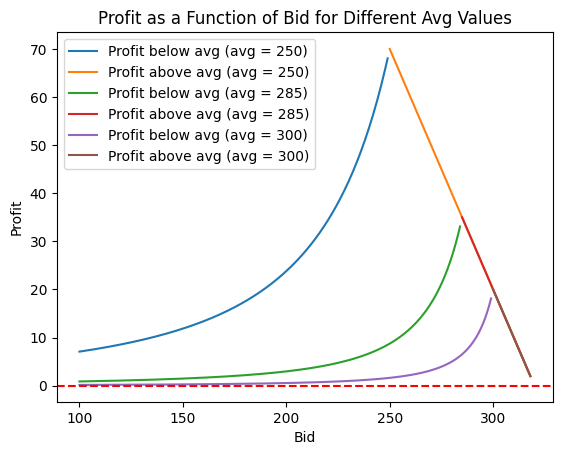

In [37]:
import matplotlib.pyplot as plt

# List of average values to compare
avg_values = [250, 285, 300]  # You can add or change values as needed

# Create a new figure
plt.figure()

for avg in avg_values:
    adjusted_avg = min(avg, 319)  # Ensure avg is not greater than 319

    # Define the bid ranges for below and above avg
    bids_below_avg = range(100, adjusted_avg)
    bids_above_avg = range(adjusted_avg, 319)

    # Calculate scale factors and profit for bids below avg
    scale_factors = [((320 - adjusted_avg) / (320 - b))**3 for b in bids_below_avg]
    profit_below_avg = [scale * (320 - bid) for scale, bid in zip(scale_factors, bids_below_avg)]
    
    # Calculate profit for bids above avg
    profit_above_avg = [320 - bid for bid in bids_above_avg]

    # Plot both profit curves for this average value
    plt.plot(bids_below_avg, profit_below_avg, label=f'Profit below avg (avg = {adjusted_avg})')
    plt.plot(bids_above_avg, profit_above_avg, label=f'Profit above avg (avg = {adjusted_avg})')

plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Bid')
plt.ylabel('Profit')
plt.title('Profit as a Function of Bid for Different Avg Values')
plt.legend()
plt.show()


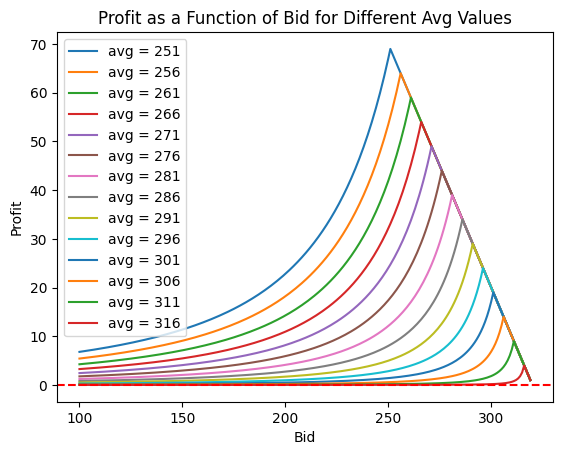

In [39]:
import matplotlib.pyplot as plt

def profit(bid, avg):
    # Ensure avg is not greater than 319
    avg = min(avg, 319)
    if bid < avg:
        # Calculate profit for bids below avg using the scale factor
        scale = ((320 - avg) / (320 - bid))**3
        return scale * (320 - bid)
    else:
        # For bids above or equal to avg, the profit is linear
        return 320 - bid

# List of average values to compare
avg_values = range(251, 319, 5)

[250, 285, 300]

# Define a common range for bid values
bids = range(100, 320)

# Plot the profit curve for each average value
plt.figure()
for avg in avg_values:
    profits = [profit(bid, avg) for bid in bids]
    plt.plot(bids, profits, label=f'avg = {avg}')

plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Bid')
plt.ylabel('Profit')
plt.title('Profit as a Function of Bid for Different Avg Values')
plt.legend()
plt.show()


obviously the optimal second bid is the average of all bids, where it is best to slightly over-estimate

nash equilibrium strategy
- need function to evaluate how well a strategy performs given others strategies
- No player can improve their own payoff by changing their strategy, assuming all others keep theirs fixed.
  - does that exist? 

Given that all other players bid b*, my best response is also to bid b*

would be useful to find out some sort of expected average bid

250-320 is the realistic range
would it be normal distrbution?


say the average is a normal distribution

find the ev
- 



280ish seems decent for second bid